#  Analyzing user interactions with the HD television service

I will explore HDdata to analyze user behaviour subscribing HD television service based on 3 aspects:

1.	User Engagement
•	Frequency of Use: How often users log in and engage with the service.
•	Session Duration: The length of time users spend on the service per session.
•	Time of Use: What times of day or days of the week the service is most used.

2.	User Interaction
•	Analyze which apps are most popular
•	Explore the types of events or actions (using Event) users take
3.	Content Consumption:
•	Look at the types of content (ItemName) that users view.
•	Analyze the duration of content viewed (using RealTimePlaying) and see if there's a change in viewing habits.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the CSV data
data = pd.read_csv('HDdata.csv')

# Displaying the first few rows of the dataframe
data.head()

,MAC,SessionMainMenu,AppName,LogID,Event,ItemID,RealTimePlaying,ItemName,BoxTime,Contract,Session,AppID,# of days
0,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,52,StopVOD,100052388,570.3,Trường Học Moorim (20 Tập),2016:02:12:12:46:23:663,SGFD81389,B046FCAC0DC1:2016:02:12:12:34:51:923,VOD,375
1,B046FCAC0DC1,2016-02-11 01:01:56.838,IPTV,40,EnterIPTV,NaN,0.0,NaN,2016:02:11:01:02:09:375,SGFD81389,B046FCAC0DC1:2016:02:11:01:01:56:813,IPTV,375
2,B046FCAC0DC1,2016-02-11 01:02:29.258,VOD,55,NextVOD,100052388,0.0,Trường Học Moorim (20 Tập),2016:02:11:03:06:16:654,SGFD81389,B046FCAC0DC1:2016:02:11:01:01:56:813,VOD,375
3,B046FCAC0DC1,2016-02-12 04:44:59.143,IPTV,18,ChangeModule,NaN,0.0,NaN,2016:02:12:04:45:40:984,SGFD81389,B046FCAC0DC1:2016:02:12:04:44:54:688,VOD,375
4,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,54,PlayVOD,100052388,0.0,Trường Học Moorim (20 Tập),2016:02:12:12:47:37:208,SGFD81389,B046FCAC0DC1:2016:02:12:12:34:51:923,VOD,375


## User Engagement

### How often users log in and engage with the service?

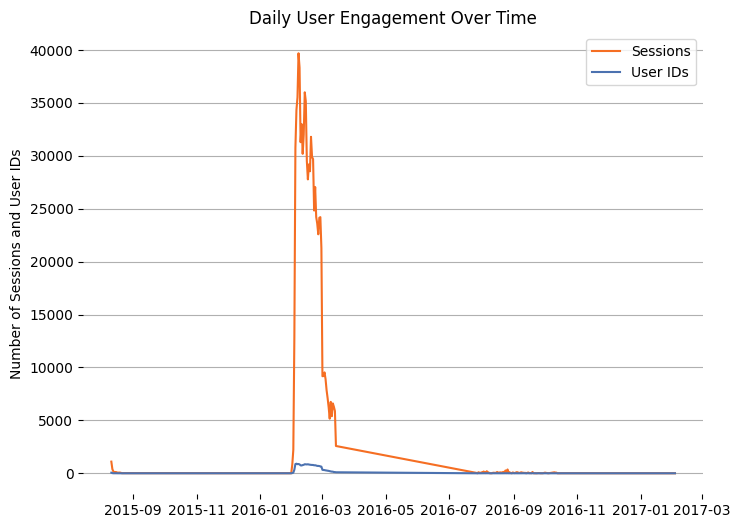

In [5]:
# Create a chart showing daily user engagement over time

# Converting 'SessionMainMenu' to datetime
data['SessionMainMenu'] = pd.to_datetime(data['SessionMainMenu'])

# Extracting date from 'SessionMainMenu'
data['Date'] = data['SessionMainMenu'].dt.date

# Grouping by date and counting number of sessions and unique MACs
daily_engagement = data.groupby('Date').agg({'Session': 'count', 'MAC': 'nunique'})

fig, ax = plt.subplots(figsize=(8,6)) 

# Plotting the sessions
daily_engagement['Session'].plot(color='#F56E23', ax=ax)

# Plotting the MACs as user ids
daily_engagement['MAC'].plot(color='#4C72B0', ax=ax)

title = ax.set_title('Daily User Engagement Over Time')
title.set_color('black')

ax.set_xlabel('') 
ax.set_ylabel('Number of Sessions and User IDs')

ax.grid(axis='y')
ax.legend(['Sessions', 'User IDs'])

# Removing frame
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

The plot above shows the daily frequency of use of the television service. There seems to be a clear pattern indicating lesser usage during certain periods. To better understand the events that cause peak sessions, we zoom in data to identify any specifics related to high user engagement.

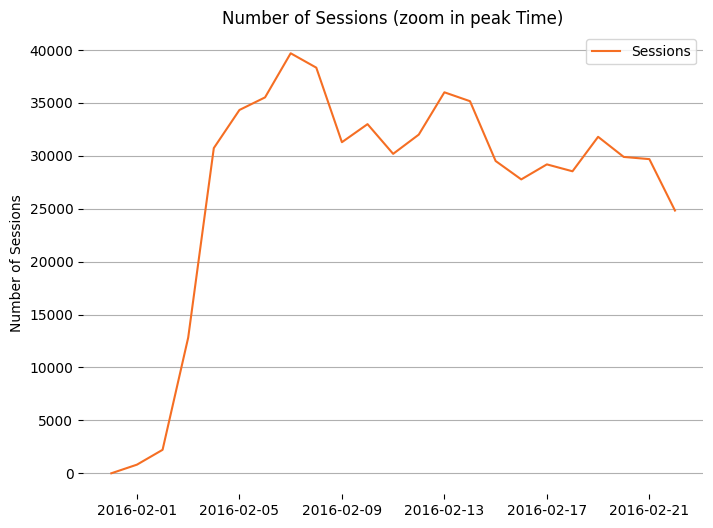

In [7]:
# The peak date can be found by identifying the date with maximum sessions.
peak_date_Session = daily_engagement['Session'].idxmax()

# We consider a period of 15 days before and after the peak date for zooming in.
start_time_Session = peak_date_Session - pd.Timedelta(days=15)
end_time_Session = peak_date_Session + pd.Timedelta(days=15)

# Filtering the 'daily_engagement' to include only the selected period
zoomed_engagement_Session = daily_engagement.loc[start_time_Session : end_time_Session]

# Create one subplot
fig, ax = plt.subplots(figsize=(8,6))

# Plotting the 'Session' data on the subplot
zoomed_engagement_Session['Session'].plot(color='#F56E23', ax=ax)

# Setting the title
title = ax.set_title('Number of Sessions (zoom in peak Time)')
title.set_color('black')

ax.set_ylabel('Number of Sessions')
ax.legend(['Sessions'])  # Add legend to represent session line

ax.grid(axis='y') # Horizontal grid lines

# Remove frames and labels for x-axis on subplot
for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.set_xlabel('')

plt.show()

This period time aligned with Tet Holiday 2016, when users had more free time. Finding channel users watched most in these days

The chart shows that Disney was the most watched channel during the peak period of session traffic. This could be because during holidays, children often have ample free time and likely control the TV viewer choices.

### Time of Use: What times of day or days of the week the service is most used.

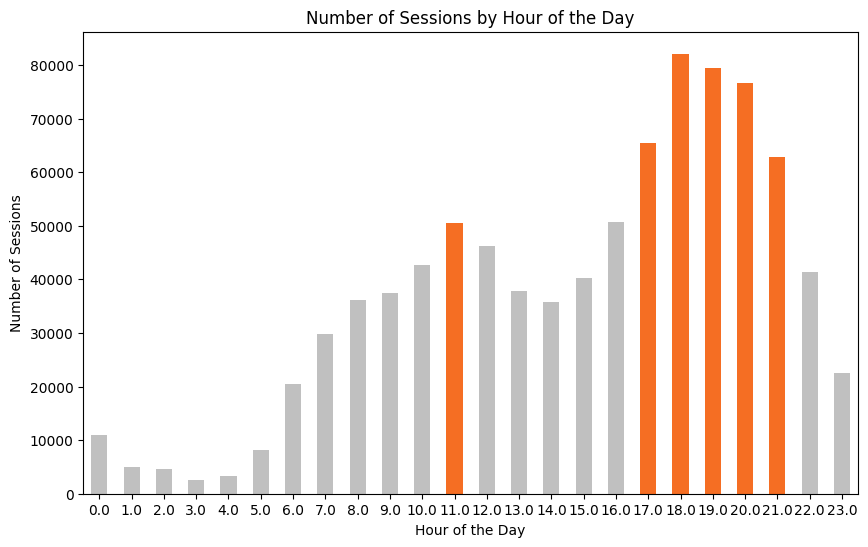

In [10]:
# Extracting the hour from 'SessionMainMenu'
data['Hour'] = data['SessionMainMenu'].dt.hour

# Grouping by hour and counting the number of sessions
hourly_sessions = data.groupby('Hour')['Session'].count()

# Identifying the hours that correspond to the 5 highest numbers of sessions
top_hours = hourly_sessions.nlargest(5).index

# Defining the color for each hour
colors = ['#F56E23' if hour in top_hours or hour == 11 else '#C0C0C0' for hour in hourly_sessions.index]

# Plotting the sessions by hour with the specified colors
fig, ax = plt.subplots(figsize=(10,6))

hourly_sessions.plot(kind='bar', color=colors, ax=ax)

ax.set_title('Number of Sessions by Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Sessions')

plt.xticks(rotation=0)

plt.show()

The bar plot showcases the number of sessions happening each hour of the day. It looks like the most popular times for using the service are in the evening hours, from 18:00 to 22:00. This may be due to users getting home from work and relaxing with television content.


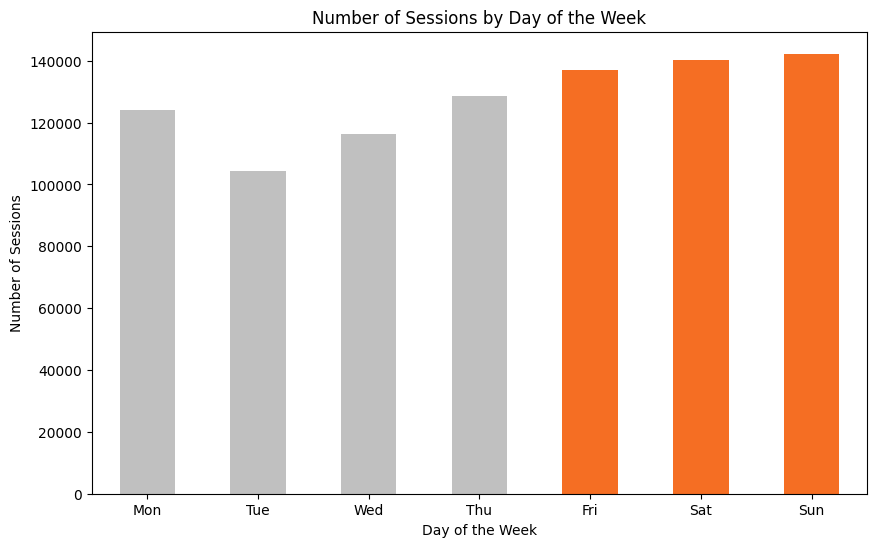

In [12]:
# Extracting the day of week from 'SessionMainMenu'
data['DayOfWeek'] = data['SessionMainMenu'].dt.dayofweek

# Mapping 'DayOfWeek' from 0-6 into Mon-Sun
day_of_week = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data['DayOfWeek'].map(day_of_week)

# Grouping by DayOfWeek and counting the number of sessions
day_of_week_sessions = data.groupby('DayOfWeek')['Session'].count()

# 'reindex' is used to ensure the weekday order is correct in the plot
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_sessions = day_of_week_sessions.reindex(weekday_order)

# Plotting the sessions by DayOfWeek
fig, ax = plt.subplots(figsize=(10,6))

# Highlight weekends by changing colors 
weekend_colors = ['#F56E23' if day in ['Fri', 'Sat', 'Sun'] else '#C0C0C0' for day in weekday_order]

day_of_week_sessions.plot(kind='bar', color=weekend_colors, ax=ax)

ax.set_title('Number of Sessions by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Sessions')

plt.xticks(rotation=0)

plt.show()

The bar plot showcases the number of sessions by day of the week. The service is generally used more during the weekend, with Sunday showing the highest usage. 

### Session Duration: The length of time users spend on the service per session.

In [13]:
# filter out rows where 'RealTimePlaying' > 0
filtered_data = data[data['RealTimePlaying'] > 0]

# Then, group by 'MAC' (user id) and calculate the mean of 'RealTimePlaying'
average_play_time_per_user = filtered_data.groupby('MAC')['RealTimePlaying'].mean()

# Describe the dataframe
average_play_time_per_user.describe()


count      1619.000000
mean       3839.534464
std       32588.208140
min           5.032300
25%         413.025113
50%         786.449638
75%        1676.583306
max      972360.998333
Name: RealTimePlaying, dtype: float64

The average playing time varies significantly amongst users. It ranges from around 5 seconds for the least engaged users to around 1 hour 38 minutes for the most engaged ones. The wide range of averages indicates that user engagement varies a lot in terms of time spent playing.

## User Interaction

### Analyze which apps are most popular

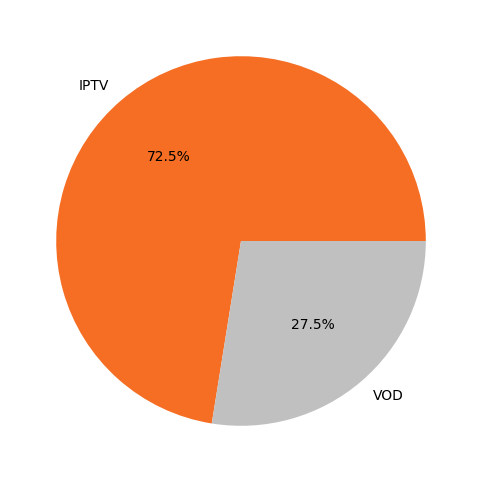

In [14]:
# Grouping by 'AppName' and counting the number of sessions
app_popularity = data.groupby('AppName')['Session'].count()

# Sorting the series in descending order for a better visualization
app_popularity = app_popularity.sort_values(ascending=False)

# Define color for IPTV and weak color for others
colors = ['#F56E23' if app == 'IPTV' else '#C0C0C0' for app in app_popularity.index]

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(app_popularity, labels = app_popularity.index, autopct='%1.1f%%', colors=colors)
plt.title('')
plt.show()

The most popular apps are IPTV and VOD, with IPTV having significantly more sessions, nearly triple that of VOD

### Explore touchpoint of user when using service

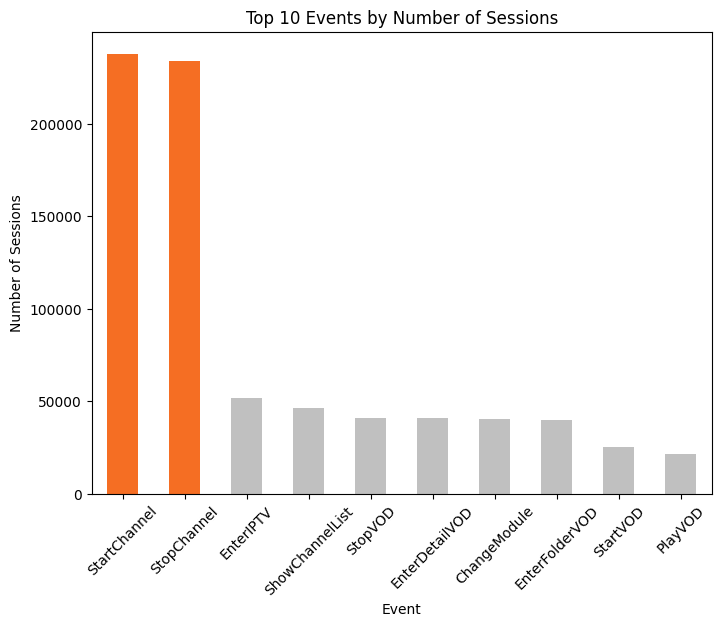

In [15]:
# Grouping by 'Event' and counting the number of sessions
event_count = data.groupby('Event')['Session'].count()

# Sorting the Series in descending order for a better visualization
event_count = event_count.sort_values(ascending=False)

# Select only top 10 events
top_10_events = event_count.nlargest(10)

# Define color for the top 3 events and grey color for others
colors = ['#F56E23' if event in top_10_events.nlargest(2).index else '#C0C0C0' for event in top_10_events.index]

# Plot a bar chart
fig, ax = plt.subplots(figsize=(8,6))

top_10_events.plot(kind='bar', color=colors, ax=ax)

ax.set_title('Top 10 Events by Number of Sessions')
ax.set_ylabel('Number of Sessions')
plt.xticks(rotation=45)

plt.show()

The bar chart displays the count of events by number of sessions. 'StartChannel' and 'StopChannel' emerge as the most frequent events. This suggests that users often change channels. We can further delve into this by calculating the time duration between a user's switch from 'StartChannel' to 'StopChannel'.

In [23]:
# First, let's filter the data to get only the 'StartChannel' and 'StopChannel' events
start_stop_data = data[data['Event'].isin(['StartChannel', 'StopChannel'])]

# We sort the data by 'MAC' and 'SessionMainMenu' to make sure the events for each user are in order
start_stop_data = start_stop_data.sort_values(['MAC', 'SessionMainMenu'])

# Next let's calculate the time between rows
start_stop_data['TimeDiff'] = start_stop_data.groupby('MAC')['SessionMainMenu'].diff()

# Because 'StartChannel' and 'StopChannel' events should be paired, any 'TimeDiff' calculated within a pair would be invalid
# We add a shift column to identify and remove these invalid 'TimeDiff's
start_stop_data['Event_Shift'] = start_stop_data.groupby('MAC')['Event'].shift()
start_stop_data.loc[start_stop_data['Event_Shift'] == start_stop_data['Event'], 'TimeDiff'] = None

# Convert 'TimeDiff' to seconds for better interpretation
start_stop_data['TimeDiff'] = start_stop_data['TimeDiff'].dt.total_seconds()

# Let's inspect the result
direct_time_diffs = start_stop_data.dropna(subset=['TimeDiff']) # drop null values from TimeDiff column

/tmp/ipykernel_37/971940480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_time_diffs['TimeDiff'] = direct_time_diffs['TimeDiff'] / 60


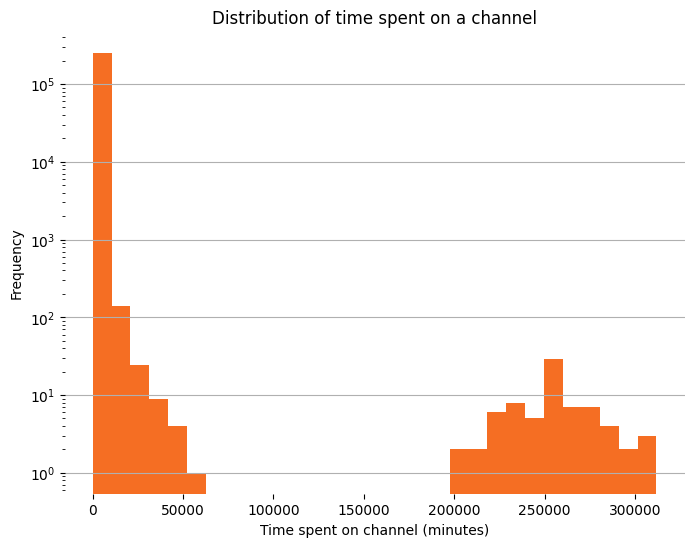

In [24]:
# Now we have a column 'TimeDiff' representing the time spent on each channel by the user. 
# We will now visualize this data using a histogram.

# Convert 'TimeDiff' from seconds to minutes for better interpretation
direct_time_diffs['TimeDiff'] = direct_time_diffs['TimeDiff'] / 60

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(direct_time_diffs['TimeDiff'], bins=30, color='#F56E23')
plt.yscale('log')
ax.set_xlabel('Time spent on channel (minutes)')  # edit label to reflect changes
ax.set_ylabel('Frequency')
ax.set_title('Distribution of time spent on a channel')

ax.grid(axis='y') # Changed to add only the horizontal grid

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

The histogram depicts the time spent on a channel by users. Most of the user interactions fall into the lower time interval bins, indicating that short-duration channel interactions are more frequent. The distribution is heavily right-skewed; although most interactions are of short duration, some interactions last significantly longer, though these cases are rare. 

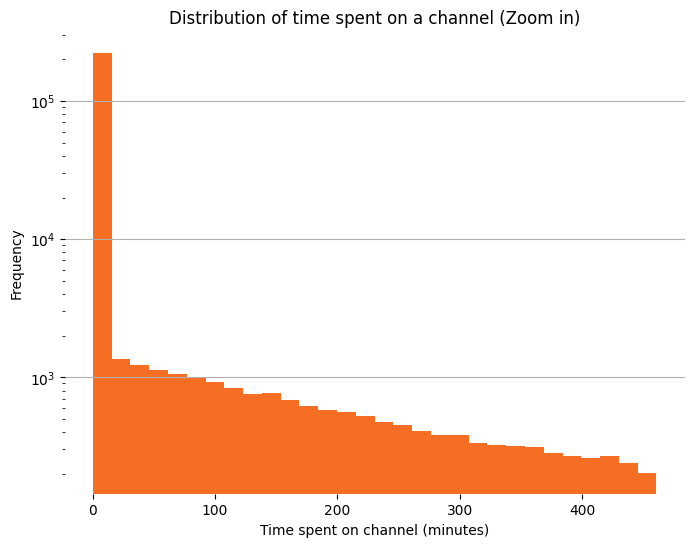

In [25]:
# Identify the 95th percentile value for TimeDiff
time_diff_95_percentile = direct_time_diffs['TimeDiff'].quantile(0.95)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(direct_time_diffs['TimeDiff'], bins=30, color='#F56E23', range=(0, time_diff_95_percentile))
plt.yscale('log')
ax.set_xlabel('Time spent on channel (minutes)')  
ax.set_ylabel('Frequency')
ax.set_title('Distribution of time spent on a channel (Zoom in)')
ax.grid(axis='y')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

The updated histogram shows the zoomed-in view of time spent on a channel by users for time intervals up to the 95th percentile. As before, most of the user interactions fall into shorter time intervals, indicating that these shorter duration channel interactions are most common. The chart now excludes longer-duration interactions, offering a clearer view of the most frequent interaction durations.

46.44% of total 'StartChannel' events transition to 'StopChannel' within less than 1 minute. This suggests that users frequently switch channels and spend less than a minute on a high proportion of them.

In [30]:
# Let's filter the dataframe 'direct_time_diffs' to include only rows with 'TimeDiff' less than 1 minute
short_time_diffs = direct_time_diffs[direct_time_diffs['TimeDiff'] < 1]

# group by 'ItemName' and calculate the total 'TimeDiff' 
time_spent_by_item = short_time_diffs.groupby('ItemName')['TimeDiff'].sum().reset_index()

# We sort the dataframe by 'TimeDiff' in descending order for a better visualization
time_spent_by_item = time_spent_by_item.sort_values('TimeDiff', ascending=False)

# Select only top 10 items
time_spent_by_item_top_10 = time_spent_by_item.head(10)

# Define color for the top 3 items and grey color for others
colors = ['#F56E23' if item in time_spent_by_item_top_10.nlargest(3, 'TimeDiff')['ItemName'].values else '#C0C0C0' for item in time_spent_by_item_top_10['ItemName'].values]

time_spent_by_item_top_10

,ItemName,TimeDiff
251,VTV1 HD,40.044700
257,VTV3 HD,39.077300
270,VĨNH LONG 1,27.871167
217,TRUYỀN HÌNH FPT,26.286133
244,VTC7,24.026617
256,VTV3,23.137517
250,VTV1,21.599033
267,VTV9,15.398383
255,VTV2,15.221083
85,HTV2 HD,14.381433


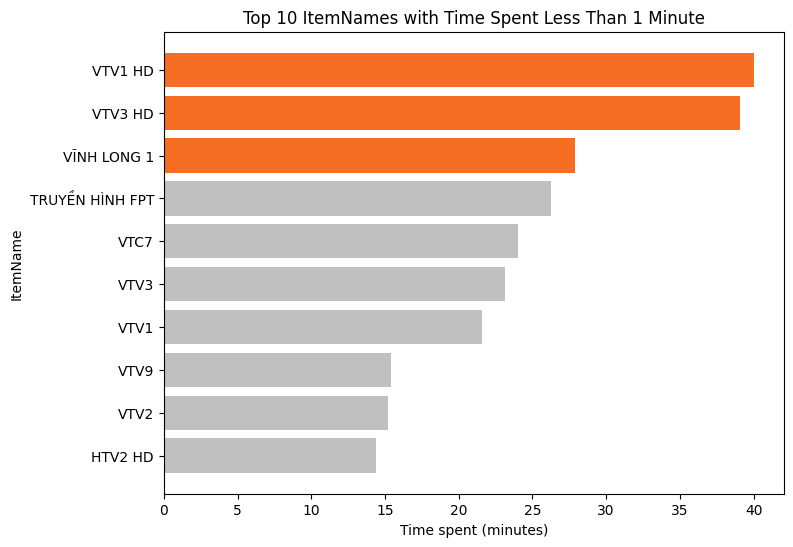

In [31]:
# Plotting the time spent on each ItemName
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(time_spent_by_item_top_10['ItemName'], time_spent_by_item_top_10['TimeDiff'], color=colors)
plt.xlabel('Time spent (minutes)')
plt.ylabel('ItemName')
plt.title('Top 10 ItemNames with Time Spent Less Than 1 Minute')
plt.gca().invert_yaxis()  # invert the y-axis so the ItemName with the most time spent comes first
plt.show()

The bar chart displays the top 10 channels (identified by 'ItemName') on which users spent less than 1 minute. From the data, it appears that users are spending a very short amount of time on various channels such as "VTC7", "VTV1 HD", and "VTV3 HD". These channels have the highest amount of short-duration viewership.

## Content Consumption

### Look at the types of content (ItemName) that users view

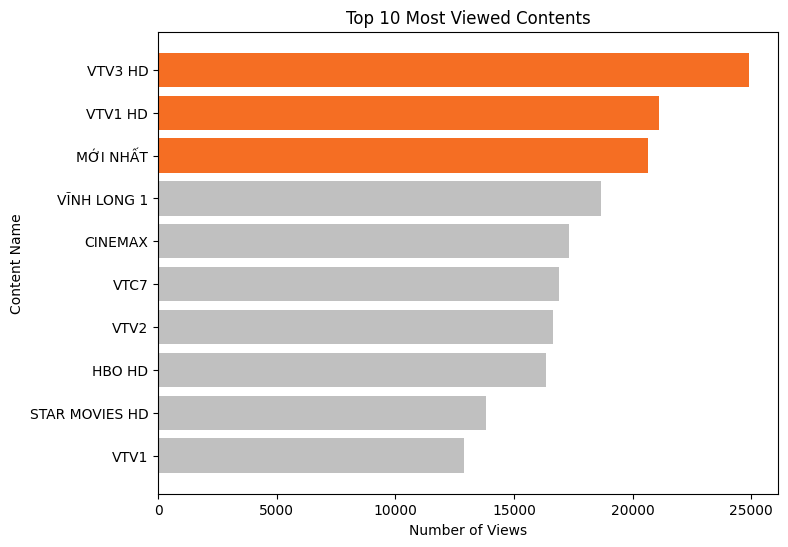

In [32]:
# Group by 'ItemName' and count the number of occurrences
content_viewed = data.groupby('ItemName')['Session'].count()

# Sort the series in descending order for a better visualization
content_viewed = content_viewed.sort_values(ascending=False)

# Select only top 10 contents
top_10_content = content_viewed.nlargest(10)

# Define color for the top 3 content and grey color for others
colors = ['#F56E23' if content in top_10_content.nlargest(3).index else '#C0C0C0' for content in top_10_content.index] 

# Plot a bar chart
plt.figure(figsize=(8,6))
plt.barh(top_10_content.index, top_10_content.values, color=colors)
plt.xlabel('Number of Views')
plt.ylabel('Content Name')
plt.title('Top 10 Most Viewed Contents')
plt.gca().invert_yaxis()  # inverts the y-axis so the most viewed content comes first
plt.show()

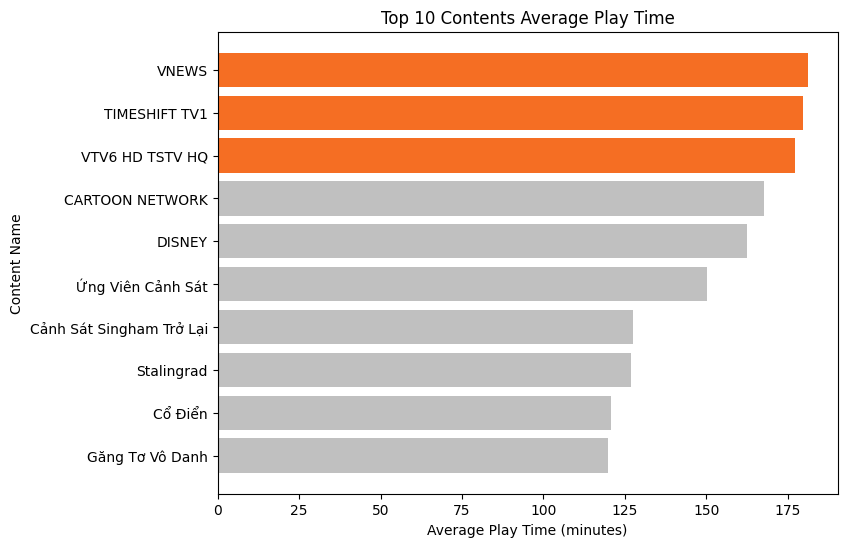

In [39]:
# filter out rows where 'RealTimePlaying' is zero
filtered_data = data[data['RealTimePlaying'] > 0]

# Group by 'ItemName' and calculate the average 'RealTimePlaying'
average_play_time_df = filtered_data.groupby('ItemName')['RealTimePlaying'].mean().reset_index()

# Convert 'RealTimePlaying' from seconds to minutes for better interpretation
average_play_time_df['RealTimePlaying'] = average_play_time_df['RealTimePlaying']/60

# Sort the dataframe by 'RealTimePlaying' in descending order for a better visualization
average_play_time_df = average_play_time_df.sort_values('RealTimePlaying', ascending=False)

# Select only top 10 contents
top_10_content_play_time = average_play_time_df.head(10)

# Define color for the top 3 content and grey color for others
colors = ['#F56E23' if content in top_10_content_play_time.nlargest(3, 'RealTimePlaying')['ItemName'].values else '#C0C0C0' for content in top_10_content_play_time['ItemName'].values]

# Plot a bar chart
plt.figure(figsize=(8,6))
plt.barh(top_10_content_play_time['ItemName'], top_10_content_play_time['RealTimePlaying'], color=colors)
plt.xlabel('Average Play Time (minutes)')
plt.ylabel('Content Name')
plt.title('Top 10 Contents Average Play Time')
plt.gca().invert_yaxis()  # inverts the y-axis so the most viewed content comes first
plt.show()

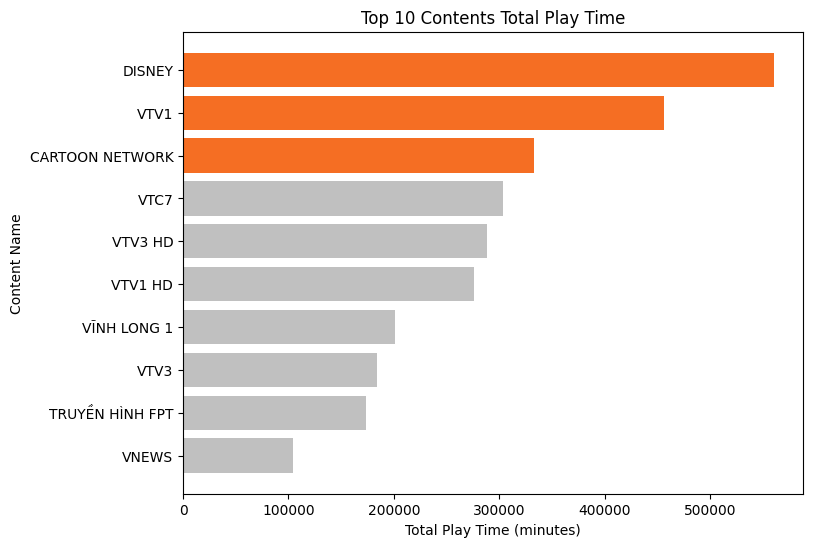

In [34]:
# Group by 'ItemName' and calculate the sum 'RealTimePlaying'
total_play_time_df = filtered_data.groupby('ItemName')['RealTimePlaying'].sum().reset_index()

# Convert 'RealTimePlaying' from seconds to minutes for better interpretation
total_play_time_df['RealTimePlaying'] = total_play_time_df['RealTimePlaying']/60

# We sort the dataframe by 'RealTimePlaying' in descending order for a better visualization
total_play_time_df = total_play_time_df.sort_values('RealTimePlaying', ascending=False)

# Select only top 10 contents, note that we base on 'RealTimePlaying'
top_10_content_total_play_time = total_play_time_df.head(10)

# Define color for the top 3 content and grey color for others
colors = ['#F56E23' if content in top_10_content_total_play_time.nlargest(3, 'RealTimePlaying')['ItemName'].values else '#C0C0C0' for content in top_10_content_total_play_time['ItemName'].values]

# Plot a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(top_10_content_total_play_time['ItemName'], top_10_content_total_play_time['RealTimePlaying'], color=colors)
plt.xlabel('Total Play Time (minutes)')
plt.ylabel('Content Name')
plt.title('Top 10 Contents Total Play Time')
plt.gca().invert_yaxis()  # inverts the y-axis so the most viewed content comes first
plt.show()

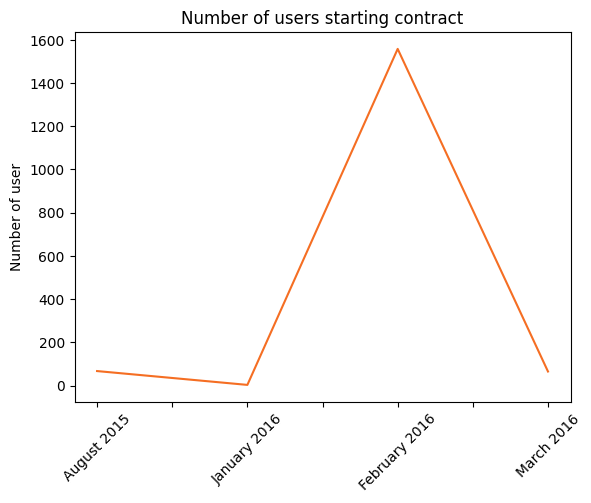

In [38]:
# Calculate start date (min SessionMainMenu) by each unique MAC
start_date_by_mac = data.groupby('MAC')['SessionMainMenu'].min()

# Extract month and year from start date
start_date_by_mac = start_date_by_mac.dt.to_period('M')

# Count the number of MACs for each start month
mac_count_by_start_month = start_date_by_mac.value_counts().sort_index().tail(10)

# Convert the period index to month names for better interpretation
mac_count_by_start_month.index = mac_count_by_start_month.index.strftime('%B %Y')

# Plot the line chart 
mac_count_by_start_month.plot(kind='line', color='#F56E23')
plt.ylabel('Number of user')
plt.title('Number of users starting contract')
plt.xticks(rotation=45)
plt.show()